<a href="https://colab.research.google.com/github/Willy-Angole/Datasets/blob/master/Classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#load data set
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
#look at data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


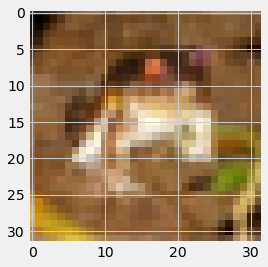

In [7]:
#view image 
index = 0
x_train[index]

img = plt.imshow(x_train[index])

In [8]:
#image label
y_train[index]

array([6], dtype=uint8)

In [10]:
#Get image classification
classification = ['airplane', 'automobile', 'bird' 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#print image class
print('image class: ', classification[y_train[index][0]])

image class:  horse


In [11]:
#convert the labels into set of 10 numbers to input neaural network
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [12]:
#print new labels
print('New labels; ', y_train_ohe)

New labels;  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
#print new label for image above
print('label: ', y_train_ohe[index])

label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
#Normalize the pixels to be 0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[index]

In [23]:
from keras.backend import conv2d
#create model architecture
model = Sequential()

#add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flattening layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add another layer with 500 neurons
model.add(Dense(500,activation='relu'))

#add dropout layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))


In [24]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )

In [25]:
#train the model
hist = model.fit(x_train, y_train_ohe,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 65s 408ms/step - loss: 1.7936 - accuracy: 0.3340 - val_loss: 1.5089 - val_accuracy: 0.4593
Epoch 2/10
157/157 [==============================] - 72s 460ms/step - loss: 1.4295 - accuracy: 0.4786 - val_loss: 1.3498 - val_accuracy: 0.5185
Epoch 3/10
157/157 [==============================] - 77s 489ms/step - loss: 1.2826 - accuracy: 0.5353 - val_loss: 1.2486 - val_accuracy: 0.5535
Epoch 4/10
157/157 [==============================] - 64s 410ms/step - loss: 1.1936 - accuracy: 0.5738 - val_loss: 1.1545 - val_accuracy: 0.5941
Epoch 5/10
157/157 [==============================] - 68s 434ms/step - loss: 1.0967 - accuracy: 0.6080 - val_loss: 1.0892 - val_accuracy: 0.6164
Epoch 6/10
157/157 [==============================] - 63s 402ms/step - loss: 1.0249 - accuracy: 0.6382 - val_loss: 1.0789 - val_accuracy: 0.6198
Epoch 7/10
157/157 [==============================] - 64s 410ms/step - loss: 0.9418 - accuracy: 0.6660 - val_loss: 0.9797 - val_ac

In [27]:
#evaluate the model using test data
model.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 7s 22ms/step - loss: 0.9728 - accuracy: 0.6664


[0.9728415012359619, 0.6664000153541565]

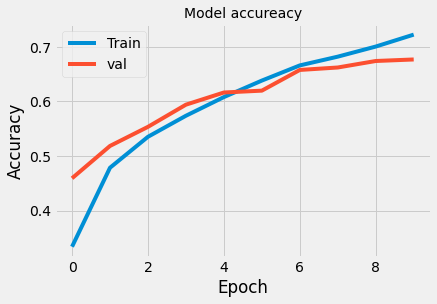

In [30]:
#visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accureacy', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'],loc='upper left')
plt.show();

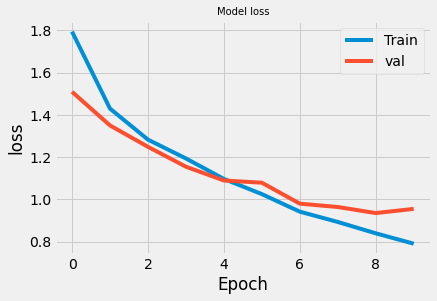

In [32]:
#visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss', fontsize=10)
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'],loc='upper right')
plt.show();

### Test the Model

In [33]:
from google.colab import files
uploaded = files.upload()

Saving benz.png to benz.png


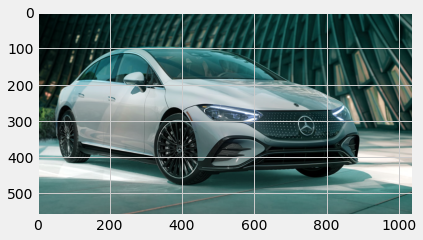

In [35]:
#view the image
new_img = plt.imread('benz.png')
sh_img = plt.imshow(new_img)

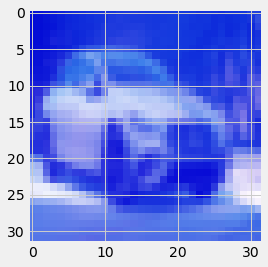

In [37]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_img, (32,32,3))
r_img = plt.imshow(resized_image)

In [38]:
#get the model prediction 
predictions = model.predict(np.array([resized_image]))
#show predictions
predictions

1/1 [==============================] - 0s 438ms/step


array([[8.5308409e-01, 7.1664648e-03, 6.7538686e-02, 6.0380585e-03,
        9.4983978e-03, 1.3479008e-03, 5.6643924e-04, 9.8038581e-04,
        4.7088947e-02, 6.6907215e-03]], dtype=float32)

In [39]:
#sort predictions in ascending order
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# print sorted predictions
print(list_index)

[0, 2, 8, 4, 1, 9, 3, 5, 7, 6]


the highest probability is 0

In [41]:
for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]] * 100, 2), '%')

airplane : 85.31 %
birdcat : 6.75 %
truck : 4.71 %
dog : 0.95 %
automobile : 0.72 %
